In [3]:
import csv
import datetime as dt

file_path = 'weather_data/sitka_weather_2021_simple.csv'

# 결과 저장용 딕셔너리 (각 열 별로 리스트 생성)
result = {
    'STATION': [],
    'NAME': [],
    'DATE': [],
    'TAVG': [],
    'TMAX': [],
    'TMIN': []
}

with open(file_path, 'r') as f:
    # .DictReader() : csv첫줄 키값사용해서 각행을 딕셔너리형태로 변환
    reader = csv.DictReader(f)
    header = next(reader)
    for line in reader:
        result['STATION'].append(line['STATION'])
        result['NAME'].append(line['NAME'])

        # 문자열 날짜 → datetime 객체로 변환
        date_obj = dt.datetime.strptime(line['DATE'], "%Y-%m-%d")
        result['DATE'].append(date_obj)

        result['TAVG'].append(line['TAVG'])
        result['TMAX'].append(line['TMAX'])
        result['TMIN'].append(line['TMIN'])

        # 한 줄만 출력 후 종료 (테스트용)
        print(header)
        print(line.keys())
        print(type(line['DATE']), line['DATE'])
        print("변환된 날짜 타입:", type(date_obj), date_obj)
        break


{'STATION': 'USW00025333', 'NAME': 'SITKA AIRPORT, AK US', 'DATE': '2021-01-01', 'TAVG': '', 'TMAX': '44', 'TMIN': '40'}
dict_keys(['STATION', 'NAME', 'DATE', 'TAVG', 'TMAX', 'TMIN'])
<class 'str'> 2021-01-02
변환된 날짜 타입: <class 'datetime.datetime'> 2021-01-02 00:00:00


In [ ]:
from collections import defaultdict

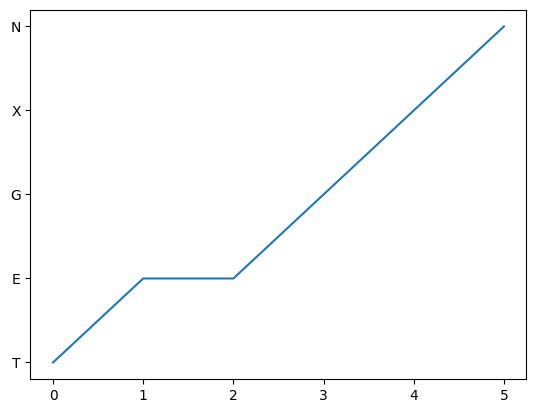

In [26]:
import matplotlib.pyplot as plt
x=range(len(result))
y=[r[3]for r in result]
plt.plot(x, y)

In [27]:
!pip install pandas

You should consider upgrading via the 'C:\Users\user\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import matplotlib.pyplot as m


In [ ]:
df = pd.read_csv(file_path)
df.head()

,STATION,NAME,DATE,TAVG,TMAX,TMIN
0,USW00025333,"SITKA AIRPORT, AK US",2021-01-01,NaN,44,40
1,USW00025333,"SITKA AIRPORT, AK US",2021-01-02,NaN,44,35
2,USW00025333,"SITKA AIRPORT, AK US",2021-01-03,NaN,43,36
3,USW00025333,"SITKA AIRPORT, AK US",2021-01-04,NaN,45,39
4,USW00025333,"SITKA AIRPORT, AK US",2021-01-05,NaN,45,40


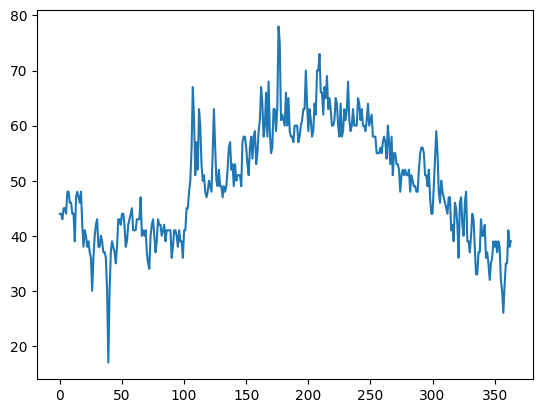

In [6]:
import matplotlib.pyplot as plt
plt.plot(df['TMAX'])

In [7]:
import datetime as dt

In [8]:
d=dt.date(2025, 7, 9)
type(d)

datetime.date

In [9]:
import datetime as dt

date_obj = dt.datetime.strptime('2025-07-09', "%Y-%m-%d")
print(date_obj)


2025-07-09 00:00:00


In [28]:
from pathlib import Path
import csv

path = Path('weather_data/sitka_weather_07-2021_simple.csv')
lines = path.read_text().splitlines()

reader = csv.reader(lines)
header_row = next(reader)
print(header_row)

['STATION', 'NAME', 'DATE', 'TAVG', 'TMAX', 'TMIN']


In [30]:
reader = csv.reader(lines)
header_row = next(reader)

for index, column_header in enumerate(header_row):
    print(index, column_header)

0 STATION
1 NAME
2 DATE
3 TAVG
4 TMAX
5 TMIN


In [33]:
reader = csv.reader(lines)
header_row = next(reader)

highs=[]
for row in reader:
    high = int(row[4])
    highs.append(high)
print(highs)

[61, 60, 66, 60, 65, 59, 58, 58, 57, 60, 60, 60, 57, 58, 60, 61, 63, 63, 70, 64, 59, 63, 61, 58, 59, 64, 62, 70, 70, 73, 66]


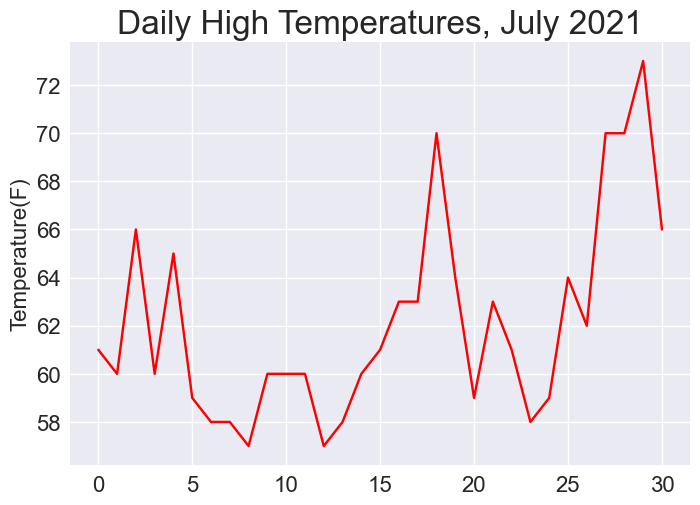

In [35]:
from pathlib import Path
import csv

import matplotlib.pyplot as plt

path = Path('weather_data/sitka_weather_07-2021_simple.csv')
lines = path.read_text().splitlines()

plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots()
ax.plot(highs, color = 'red')

ax.set_title("Daily High Temperatures, July 2021", fontsize=24)
ax.set_xlabel('',fontsize=16)
ax.set_ylabel("Temperature(F)", fontsize=16)
ax.tick_params(labelsize=16)

plt.show()



In [39]:
import csv
file_path = 'weather_data/sitka_weather_2021_simple.csv'
with open(file_path, 'r') as f:
    reader = csv.DictReader(f)
    header = next(reader)
    print('header',header)

header {'STATION': 'USW00025333', 'NAME': 'SITKA AIRPORT, AK US', 'DATE': '2021-01-01', 'TAVG': '', 'TMAX': '44', 'TMIN': '40'}


In [51]:
import datetime as dt
data = {
    'STATION': 'USW00025333',
    'NAME': 'SITKA AIRPORT, AK US',
    'DATE': '2021-01-01', 
    'TAVG': 70,
    'TMAX': 44, 
    'TMIN': 40
}
type(data)

dict

In [ ]:
import json

dumped_data = json.dumps(data)
type(dumped_data)

str

In [50]:
json.loads(dumped_data)

{'STATION': 'USW00025333',
 'NAME': 'SITKA AIRPORT, AK US',
 'DATE': '2021-01-01',
 'TAVG': '',
 'TMAX': '44',
 'TMIN': '40'}

In [ ]:
str(dt.date(2021, 1,1))

datetime.datetime(2021, 1, 1, 0, 0)

In [43]:
import json
with open('weather.json', 'w') as f:
    json.dump(data, f)

In [44]:
with open('weather.json', 'r') as f:
    data2 = json.load(f)
type(data2)

dict

In [47]:
data2['DATE2'] = dt.datetime.strptime(data2['DATE'],'%Y-%m-%d')

data2

{'STATION': 'USW00025333',
 'NAME': 'SITKA AIRPORT, AK US',
 'DATE': '2021-01-01',
 'TAVG': '',
 'TMAX': '44',
 'TMIN': '40',
 'DATE2': datetime.datetime(2021, 1, 1, 0, 0)}

In [55]:
import json

In [57]:
import json

file_path = 'eq_data/eq_data_1_day_m1.geojson'

# UTF-8로 열기 (대부분의 JSON/GeoJSON은 UTF-8 인코딩)
with open(file_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

print(data.keys())


dict_keys(['type', 'metadata', 'features', 'bbox'])


In [ ]:
data['metadata']
type(data['features'], len['features'])

{'generated': 1649052296000,
 'url': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/1.0_day.geojson',
 'title': 'USGS Magnitude 1.0+ Earthquakes, Past Day',
 'status': 200,
 'api': '1.10.3',
 'count': 160}

In [65]:
data['bbox']
data['features'][0]['geometry']

{'type': 'Point', 'coordinates': [-150.7585, 61.7591, 56.3]}

In [74]:
import json

file_path = 'eq_data/eq_data_1_day_m1.geojson'

with open(file_path, 'r', encoding='utf-8') as f:
    data = json.load(f)
    mags =[]
    lons = []
    lats = []
    mags = {}
    lons ={}
    lats = {}
     
    result= defaultdict(list)
    
    for f in data['features']:
        # print(f)
        print('mag',f['properties'],['mag'])
        print('lon', f['geometry'],['coordinates'][0])
        print('lat', f['geometry'],['coordinates'][1])
        break
        # for f in fc['features'] :
        #     break
        # break


NameError: name 'defaultdict' is not defined

In [77]:
from pathlib import Path
import matplotlib.pyplot as plt
import json
path = Path('eq_data/eq_data_1_day_m1.geojson')
contents = path.read_text()
all_eq_data = json.loads(contents)

path = Path('eq_data/readable_eq_data.geojson')
readable_contents = json.dumps(all_eq_data, indent=4)
path.write_text(readable_contents)


UnicodeDecodeError: 'cp949' codec can't decode byte 0xe2 in position 57934: illegal multibyte sequence

In [81]:
from pathlib import Path
import json

path = Path('eq_data/eq_data_1_day_m1.geojson')
contents = path.read_text(encoding='utf-8')
all_eq_data = json.loads(contents)

all_eq_dicts = all_eq_data['features']
print(len(all_eq_dicts))

160


In [92]:
all_eq_dicts = all_eq_data['features']
mags = []
for eq_dict in all_eq_dicts:
    mag = eq_dict['properties']['mag']
    mags.append(mag)
print(mags[:10])

[1.6, 1.6, 2.2, 3.7, 2.92000008, 1.4, 4.6, 4.5, 1.9, 1.8]


In [97]:
all_eq_dicts = all_eq_data['features']
mags, lons, lats = [], [], []
for eq_dict in all_eq_dicts:
    mag = eq_dict['properties']['mag']
    lon = eq_dict['geometry']['coordinates'][0]
    lat = eq_dict['geometry']['coordinates'][1]
    mags.append(mag)
print(mags[:10])
print(mags[:5])
print(mags[:5])

[1.6, 1.6, 2.2, 3.7, 2.92000008, 1.4, 4.6, 4.5, 1.9, 1.8]
[1.6, 1.6, 2.2, 3.7, 2.92000008]
[1.6, 1.6, 2.2, 3.7, 2.92000008]


In [85]:
!pip install plotly

You should consider upgrading via the 'C:\Users\user\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [87]:
!pip install nbformat --upgrade

     ---------------------------------------- 78.5/78.5 KB 4.3 MB/s eta 0:00:00
     ---------------------------------------- 88.7/88.7 KB 5.2 MB/s eta 0:00:00
     ---------------------------------------- 63.8/63.8 KB ? eta 0:00:00
     -------------------------------------- 231.6/231.6 KB 4.7 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\user\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [ ]:
from pathlib import Path
import json
import plotly.express as px

for eq_dict in all_eq_dicts:
    title = 'Global Earthquakes'
    fig = px.scatter_geo(lat=lats,lon=lons,title=title)
    fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [106]:
# 먼저 lats, lons 리스트를 채우는 코드가 있어야 합니다.
lats = [eq_dict['geometry']['coordinates'][1] for eq_dict in all_eq_dicts]
lons = [eq_dict['geometry']['coordinates'][0] for eq_dict in all_eq_dicts]

title = 'Global Earthquakes'
fig = px.scatter_geo(lat=lats, lon=lons, title=title)
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [99]:
!pip install --upgrade nbformat

You should consider upgrading via the 'C:\Users\user\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [98]:
from pathlib import Path
import json
import plotly.express as px

# 1. 파일 읽기
path = Path('eq_data/eq_data_1_day_m1.geojson')
contents = path.read_text(encoding='utf-8')
all_eq_data = json.loads(contents)

# 2. 지진 리스트 가져오기
all_eq_dicts = all_eq_data['features']

# 3. 위도/경도 추출
lats, lons = [], []
for eq_dict in all_eq_dicts:
    coords = eq_dict['geometry']['coordinates']
    lons.append(coords[0])
    lats.append(coords[1])

# 4. 시각화
title = 'Global Earthquakes'
fig = px.scatter_geo(lat=lats, lon=lons, title=title)
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed